In [2]:
print("radha")

radha


In [3]:
import numpy as np;
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("placement_LR.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


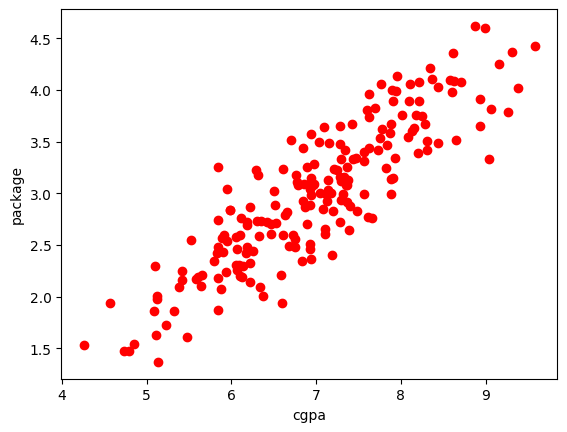

In [6]:
plt.scatter(df.cgpa , df.package ,color="red")
plt.xlabel("cgpa")
plt.ylabel("package")
plt.show()

In [9]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]


In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.2 , random_state=2);

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
lr.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


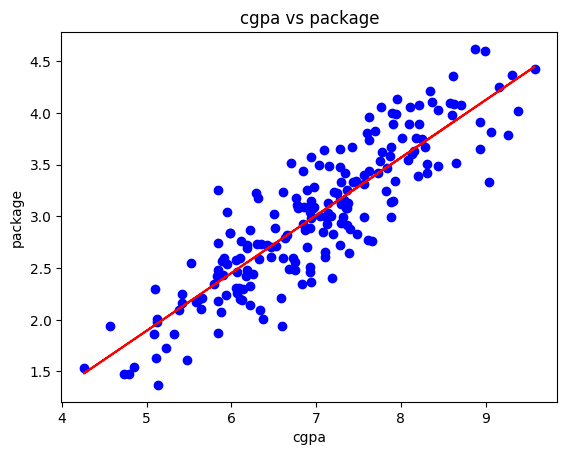

In [20]:
plt.scatter(df.cgpa , df.package ,color="blue")
plt.plot(X_train, lr.predict(X_train), color="red")
plt.xlabel("cgpa")
plt.ylabel("package")
plt.title("cgpa vs package")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [24]:
y_pred = lr.predict(X_test)

In [26]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [34]:
print("MAE" , mean_absolute_error(y_test,y_pred))
print("MSE" ,  mean_squared_error(y_test,y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2" , r2_score(y_test,y_pred))


MAE 0.2884710931878175
MSE 0.12129235313495527
RMSE 0.34827051717731616
R2 0.780730147510384


In [36]:
# adjusted r2 score
1-(1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7749598882343415

In [39]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.788364,3.26
1,5.12,0.866082,1.98
2,7.82,0.423083,3.25
3,7.42,0.226459,3.67
4,6.94,0.299915,3.57


Text(0, 0.5, 'Package(in lpa)')

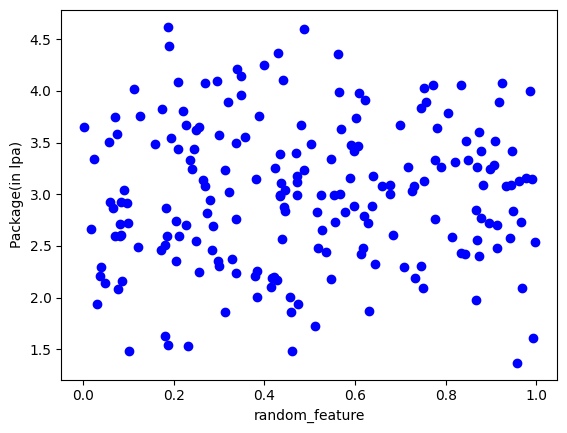

In [40]:
plt.scatter(new_df1['random_feature'],new_df1['package'], color="blue")
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [41]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [43]:
X.head()

,cgpa,random_feature
0,6.89,0.788364
1,5.12,0.866082
2,7.82,0.423083
3,7.42,0.226459
4,6.94,0.299915


In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [45]:
lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
y_pred = lr.predict(X_test)

In [47]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7781905452115782


In [48]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7662008449527445